In [3]:
import pandas as pd

url = 'http://batsftp.bios.edu/BATS/bottle/bats_pigments.txt'
yearly_co2_emmissions = pd.read_csv('yearly_co2_emissions_1000_tonnes.csv')
yearly_sulfer_emmissions_pp = pd.read_csv('sulfur_emissions_per_person_kg.csv')

In [4]:
# List of countries to target
countries = 'United States','United Kingdom','China','India','Germany','Mexico','Poland','France','Canada','Saudi Arabia'

# Initialize dataframes
co2_container = yearly_co2_emmissions.loc[yearly_co2_emmissions['country'] == countries[0]]
sulf_container = yearly_sulfer_emmissions_pp.loc[yearly_sulfer_emmissions_pp['country'] == countries[0]]
# Loop to pull target coutnries from master database
for i in countries[1:]:
    # Selects countries from datasets
    select_co2 = yearly_co2_emmissions.loc[yearly_co2_emmissions['country'] == i]
    select_sulf = yearly_sulfer_emmissions_pp.loc[yearly_sulfer_emmissions_pp['country'] == i]
    # Concats (/adds) coutnry data to new cleaned dataframe
    co2_container = pd.concat([co2_container,select_co2])
    sulf_container = pd.concat([sulf_container,select_sulf])
# Select target years
c = co2_container['country'] # select coutnries column
s = sulf_container['country']
c_data = co2_container.iloc[:,-100:] # select desired years
s_data = sulf_container.iloc[:,-100:]
new_df_co2 = pd.concat([c,c_data],1) # new data frame along x axis
new_df_sulf = pd.concat([s,s_data],1)
# Transpose dataframe // in case of issues feeding to model
co2_trans = new_df_co2.transpose()
sulf_trans = new_df_sulf.transpose()
c_new_cols = co2_trans.iloc[0]
s_new_cols = sulf_trans.iloc[0]
t_df_co2 = co2_trans.iloc[1:]
t_df_sulf = sulf_trans.iloc[1:]
t_df_co2.columns = c_new_cols
t_df_sulf.columns = s_new_cols
t_df_co2 = t_df_co2.astype(object).convert_objects()  # convert away from object into float // throws error
t_df_sulf = t_df_co2.astype(object).convert_objects()
# new_df and t_df are primary cleaned datasets
t_df_co2.iloc[0] # data for target countries in year 1915

C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


country
United States     1370000.0
United Kingdom     490000.0
China               16100.0
India               36300.0
Germany            463000.0
Mexico              14300.0
Poland              94800.0
France             103000.0
Canada              61200.0
Saudi Arabia            NaN
Name: 1915, dtype: float64

In [25]:
new_df_co2

,country,1915,1916,1917,1918,1919,1920,1921,1922,1923,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
183,United States,1370000.0,1520000.0,1670000.0,1750000.0,1480000.0,1740000.0,1420000.0,1430000.0,1900000.0,...,5790000.0,5700000.0,5790000.0,5610000.0,5260000.0,5400000.0,5290000.0,5120000.0,5160000.0,5250000.0
182,United Kingdom,490000.0,507000.0,502000.0,467000.0,457000.0,470000.0,320000.0,429000.0,455000.0,...,543000.0,541000.0,528000.0,521000.0,472000.0,493000.0,448000.0,469000.0,458000.0,420000.0
35,China,16100.0,18000.0,19900.0,21100.0,24300.0,26800.0,25300.0,26700.0,32200.0,...,5900000.0,6530000.0,7030000.0,7550000.0,8000000.0,8780000.0,9730000.0,10000000.0,10300000.0,10300000.0
75,India,36300.0,36700.0,38400.0,43200.0,47200.0,38200.0,41100.0,40400.0,41600.0,...,1220000.0,1300000.0,1410000.0,1570000.0,1740000.0,1720000.0,1840000.0,2020000.0,2030000.0,2240000.0
63,Germany,463000.0,501000.0,525000.0,504000.0,388000.0,430000.0,474000.0,456000.0,332000.0,...,797000.0,816000.0,781000.0,781000.0,722000.0,759000.0,732000.0,740000.0,757000.0,720000.0
109,Mexico,14300.0,17200.0,26200.0,30700.0,41100.0,76300.0,90400.0,85600.0,72100.0,...,466000.0,479000.0,481000.0,493000.0,476000.0,464000.0,484000.0,496000.0,490000.0,480000.0
136,Poland,94800.0,109000.0,121000.0,102000.0,2730.0,76400.0,75000.0,71800.0,52600.0,...,303000.0,319000.0,314000.0,315000.0,298000.0,316000.0,317000.0,300000.0,302000.0,286000.0
59,France,103000.0,110000.0,122000.0,109000.0,116000.0,152000.0,138000.0,163000.0,184000.0,...,385000.0,376000.0,369000.0,366000.0,352000.0,353000.0,332000.0,333000.0,334000.0,303000.0
30,Canada,61200.0,76500.0,85300.0,89600.0,76200.0,84400.0,80500.0,69300.0,93100.0,...,557000.0,544000.0,554000.0,561000.0,537000.0,535000.0,537000.0,517000.0,517000.0,537000.0
144,Saudi Arabia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,398000.0,433000.0,388000.0,430000.0,469000.0,518000.0,500000.0,565000.0,541000.0,601000.0


In [6]:
t_df_co2

country,United States,United Kingdom,China,India,Germany,Mexico,Poland,France,Canada,Saudi Arabia
1915,1370000.0,490000.0,16100.0,36300.0,463000.0,14300.0,94800.0,103000.0,61200.0,NaN
1916,1520000.0,507000.0,18000.0,36700.0,501000.0,17200.0,109000.0,110000.0,76500.0,NaN
1917,1670000.0,502000.0,19900.0,38400.0,525000.0,26200.0,121000.0,122000.0,85300.0,NaN
1918,1750000.0,467000.0,21100.0,43200.0,504000.0,30700.0,102000.0,109000.0,89600.0,NaN
1919,1480000.0,457000.0,24300.0,47200.0,388000.0,41100.0,2730.0,116000.0,76200.0,NaN
1920,1740000.0,470000.0,26800.0,38200.0,430000.0,76300.0,76400.0,152000.0,84400.0,NaN
1921,1420000.0,320000.0,25300.0,41100.0,474000.0,90400.0,75000.0,138000.0,80500.0,NaN
1922,1430000.0,429000.0,26700.0,40400.0,456000.0,85600.0,71800.0,163000.0,69300.0,NaN
1923,1900000.0,455000.0,32200.0,41600.0,332000.0,72100.0,52600.0,184000.0,93100.0,NaN
1924,1700000.0,476000.0,35100.0,44500.0,452000.0,67900.0,47900.0,207000.0,77400.0,NaN


In [7]:
new_df_sulf

,country,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
156,United States,58.60000,59.80000,69.10000,67.20000,73.50000,75.70000,84.90000,73.20000,80.10000,...,40.10,39.00,38.00,36.80,31.70,30.90,31.30,31.10,28.50,26.30
155,United Kingdom,43.50000,44.90000,45.00000,44.90000,45.20000,46.50000,48.30000,46.90000,47.00000,...,30.70,29.90,26.90,23.00,20.20,17.30,14.20,13.60,10.40,10.00
33,China,0.02480,0.02660,0.02840,0.02990,0.03230,0.21400,0.21300,0.21200,0.21200,...,7.99,7.61,7.89,7.72,7.85,7.49,9.54,8.41,7.41,7.90
68,India,0.30900,0.34000,0.34000,0.37000,0.37700,0.42900,0.48000,0.54000,0.50600,...,2.74,2.79,2.83,2.91,3.03,3.24,3.27,3.00,2.80,2.71
57,Germany,27.90000,27.20000,28.00000,28.70000,28.90000,30.30000,31.20000,30.50000,30.90000,...,25.00,20.50,18.10,15.20,11.90,8.18,6.33,5.10,4.48,3.87
98,Mexico,4.26000,4.54000,5.29000,5.69000,6.79000,6.34000,6.18000,5.78000,6.87000,...,13.00,12.70,12.20,13.70,11.80,12.20,13.20,14.40,13.30,13.80
121,Poland,27.40000,26.60000,27.60000,27.90000,29.60000,30.80000,33.10000,34.20000,34.50000,...,41.30,36.80,35.40,33.80,30.80,30.60,28.20,24.50,22.20,19.60
54,France,6.51000,6.08000,6.50000,6.30000,6.26000,7.06000,7.65000,7.75000,8.02000,...,12.70,11.00,9.48,8.99,8.41,8.17,6.87,6.99,5.96,5.28
28,Canada,62.70000,63.90000,68.40000,76.40000,82.30000,86.20000,85.80000,98.40000,92.90000,...,64.40,55.00,44.80,43.00,44.30,42.10,41.60,41.40,40.40,38.00
127,Saudi Arabia,0.00035,0.00055,0.00077,0.00131,0.00119,0.00137,0.00163,0.00181,0.00192,...,30.70,30.30,24.90,21.20,18.00,16.90,13.40,11.10,9.83,9.43


In [11]:
t_df_sulf

country,United States,United Kingdom,China,India,Germany,Mexico,Poland,France,Canada,Saudi Arabia
1915,1370000.0,490000.0,16100.0,36300.0,463000.0,14300.0,94800.0,103000.0,61200.0,NaN
1916,1520000.0,507000.0,18000.0,36700.0,501000.0,17200.0,109000.0,110000.0,76500.0,NaN
1917,1670000.0,502000.0,19900.0,38400.0,525000.0,26200.0,121000.0,122000.0,85300.0,NaN
1918,1750000.0,467000.0,21100.0,43200.0,504000.0,30700.0,102000.0,109000.0,89600.0,NaN
1919,1480000.0,457000.0,24300.0,47200.0,388000.0,41100.0,2730.0,116000.0,76200.0,NaN
1920,1740000.0,470000.0,26800.0,38200.0,430000.0,76300.0,76400.0,152000.0,84400.0,NaN
1921,1420000.0,320000.0,25300.0,41100.0,474000.0,90400.0,75000.0,138000.0,80500.0,NaN
1922,1430000.0,429000.0,26700.0,40400.0,456000.0,85600.0,71800.0,163000.0,69300.0,NaN
1923,1900000.0,455000.0,32200.0,41600.0,332000.0,72100.0,52600.0,184000.0,93100.0,NaN
1924,1700000.0,476000.0,35100.0,44500.0,452000.0,67900.0,47900.0,207000.0,77400.0,NaN


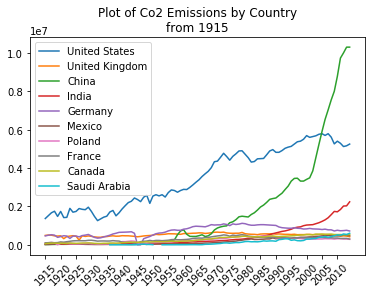

In [73]:
import matplotlib.pyplot as plt
import numpy as np
yrs = new_df_co2.columns[1:]
for i in range(len(new_df_co2)):
    plt.plot(yrs,new_df_co2.iloc[i][1:],label=new_df_co2.iloc[i][0])
    plt.title('Plot of Co2 Emissions by Country\nfrom 1915')
plt.xticks(np.arange(0,100,5),rotation=45)
plt.legend()